In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sys
sys.path.append(r'/Users/manick/Python Training/CustomPackages')
import udp_draw_decision_tree as ddt
import os
os.chdir(r'/Users/manick/Python Training/dataset')

In [4]:
infile = pd.read_csv('train.csv')
predfile = pd.read_csv('test.csv')


In [5]:
mergfile = infile.append(predfile,sort=True)

In [6]:
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
mergfile['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [8]:
str1 = 'Braund, Mr. Owen Harris'
str1.split(',')[1]

' Mr. Owen Harris'

In [9]:
#print(mergfile['Name'][0])
#print(mergfile['Name'].str.split(',')[0])
titledf=mergfile['Name'].str.split(',', expand=True)
titledf=titledf[1].str.split('.',expand=True)
mergfile['Title'] = titledf[0].str.strip()
mergfile.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs


In [10]:
mergfile['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Jonkheer          1
Capt              1
the Countess      1
Mme               1
Don               1
Sir               1
Dona              1
Lady              1
Name: Title, dtype: int64

In [11]:
mergfile.pivot_table(index='Title', values='Age', aggfunc = 'mean')
#mergfile.loc[mergfile['Age'].isnull(), 'Title']
mergfile.loc[mergfile['Age'].isnull(), 'Title'].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Title, dtype: int64

In [12]:
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Mr'), 'Age'] =32
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Mrs'), 'Age'] =35
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Dr'), 'Age'] =40
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Miss'), 'Age'] =21
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Master'), 'Age'] =5

In [13]:
mergfile.loc[ (mergfile['Age'].isnull()) & (mergfile['Title']=='Ms'), 'Age'] =28

In [14]:
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [15]:
mergfile['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
mergfile.loc[mergfile['Embarked'].isnull(), 'Embarked'] ='S'

In [17]:
mergfile.loc[ mergfile['Fare'].isnull(), :]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr


In [18]:
mergfile.pivot_table(index ='Pclass', values = 'Fare', aggfunc = 'describe')

,25%,50%,75%,count,max,mean,min,std
Pclass,,,,,,,,
1,30.6958,60.0000,107.6625,323.0,512.3292,87.508992,0.0,80.447178
2,13.0000,15.0458,26.0000,277.0,73.5000,21.179196,0.0,13.607122
3,7.7500,8.0500,15.2458,708.0,69.5500,13.302889,0.0,11.494358


In [19]:
mergfile.loc[mergfile['Fare'].isnull(), 'Fare'] =8

In [20]:
mergfile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [21]:
mergfile['FamilySize'] = mergfile['Parch'] + mergfile['SibSp'] +1
mergfile['FamilySize'].value_counts()
mergfile['FamilyCatg'] = pd.cut(mergfile['FamilySize'], [0,1,2,4,20], labels =['Single', 'Couple', 'Small', 'Large'])

In [22]:
catg_df = pd.get_dummies(mergfile.loc[:,['Sex', 'Embarked','FamilyCatg', 'Title']], drop_first=True)
catg_df.head(2)
#modfile = pd.concat([infile, catg_df],axis=1)
#modfile.head(2)
num_df = mergfile.loc[:,['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'PassengerId']]

new_df = pd.concat([num_df, catg_df], axis = 1)

new_df.head(2)

,Age,Fare,Parch,Pclass,SibSp,Survived,PassengerId,Sex_male,Embarked_Q,Embarked_S,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,22.0,7.2500,0,3,1,0.0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,71.2833,0,1,1,1.0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
modtrain = new_df.loc[ new_df['Survived'] <= 1, :]
modtest = new_df.loc[ new_df['Survived'].isnull(),:]
print(modtrain.shape, modtest.shape)

(891, 30) (418, 30)


In [24]:
modtrain.to_csv('modtrain.csv', index = None)
modtest.to_csv('modtest.csv', index = None)

In [25]:
#model
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtmod = DecisionTreeClassifier(min_impurity_decrease=.01)
x = modtrain.drop(columns = ['PassengerId', 'Survived'])
y = modtrain['Survived']
dtmod.fit(x,y)

predX = modtest.drop(columns = ['PassengerId', 'Survived'])
predSurvival = dtmod.predict(predX)

outdf = pd.DataFrame()
outdf['PassengerId'] = modtest['PassengerId']
outdf['Survived'] = predSurvival
outdf['Survived'] = outdf['Survived'].astype(int)
outdf.to_csv('Pred2.csv', index = None)

In [27]:
#p1 = dtmod.predict(x)
#pd.crosstab(y,p1)

------Below are copy of Titanic.py file ------------

In [28]:
x = modtrain.loc[:,['Sex_male','Pclass']]
y = modtrain['Survived']
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.25,random_state=1234,stratify=y)


In [29]:
dtmod = DecisionTreeClassifier()
dtmod.fit(train_x,train_y)
predTrain = dtmod.predict(train_x)
pd.crosstab(train_y,predTrain)


col_0,0.0,1.0
Survived,,
0.0,405,7
1.0,133,123


In [30]:

catgdf = pd.get_dummies(predfile.loc[:, ['Sex']], drop_first=True)
modfile = pd.concat([predfile,catgdf], axis=1)
pred_x = modfile.loc[:, ['Sex_male','Pclass']]
predFinal = dtmod.predict(pred_x)

In [31]:
outdf = pd.DataFrame()
outdf['PassengerId'] = predfile['PassengerId']
outdf['Survived'] = predFinal
outdf.to_csv('Titanic Predictions.csv', index=None)

In [32]:
outdf.head(20)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,0.0


In [33]:
predTest = dtmod.predict(test_x)
pd.crosstab(test_y,predTest)

col_0,0.0,1.0
Survived,,
0.0,135,2
1.0,48,38


In [34]:
from sklearn.ensemble import RandomForestClassifier

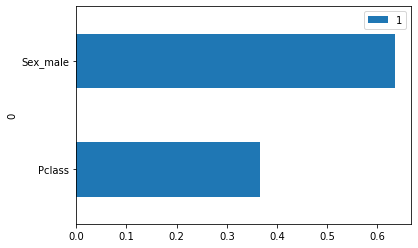

In [35]:
rfmod=RandomForestClassifier (n_estimators=100,
min_impurity_decrease=0.01,
random_state=1234)
rfmod.fit(train_x,train_y)
predTrain - rfmod.predict(train_x)
#calculate_classification_metrics(train_y,predTrain)

predTest - rfmod.predict(test_x)
#calculate_classification_metrics(test_y,predTrain)

varimp=pd.DataFrame([train_x.columns,rfmod.feature_importances_]).T
varimp=varimp.sort_values(by=1,ascending=True)

%matplotlib inline
varimp.plot.barh(x=0,y=1) #0 and 1 is the cloumn heading